# Comparison evaluation
## MovieLens dataset

In [10]:
# import utils.common
# import evaluation
# import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [11]:
def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

In [12]:
ml_car = pd.read_csv('../evals/Comp_ConstraintAutoRec_ML_pretrain.csv', index_col = 0)
ml_car['dataset'] = 'MovieLens'
ml_car['training_time'] = 87.0
ml_car.name = 'CAR'

msd_car = pd.read_csv('../evals/Comp_ConstraintAutoRec_MSD_comparison.csv', index_col = 0)
msd_car['dataset'] = 'MSD'
msd_car['training_time'] = 61.0
msd_car.name = 'CAR'

# ml_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comparison_ML.csv', index_col = 0)
# ml_nlr['dataset'] = 'MovieLens'
# ml_nlr['training_time'] = 546.0
# ml_nlr.name = 'NLR'

ml_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comp_ML_V2.csv', index_col = 0)
ml_nlr['dataset'] = 'MovieLens'
ml_nlr['training_time'] = 75.0
ml_nlr.name = 'NLR'

# msd_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comparison_MSD.csv', index_col = 0)
# msd_nlr['dataset'] = 'MSD'
# msd_nlr['training_time'] = 335.0
# msd_nlr.name = 'NLR'

msd_nlr = pd.read_csv('../evals/Comp_NeuralLogicRec_comp_MSD_V2_025.csv', index_col = 0)
msd_nlr['dataset'] = 'MSD'
msd_nlr['training_time'] = 110.0
msd_nlr.name = 'NLR'

ml_bpr = pd.read_csv('../evals/Comp_BPR_comparison_ml.csv', index_col = 0)
ml_bpr['dataset'] = 'MovieLens'
ml_bpr['training_time'] = 400.0
ml_bpr.name = 'BPR'

msd_bpr = pd.read_csv('../evals/Comp_BPR__comparison_msd.csv', index_col = 0)
msd_bpr['dataset'] = 'MSD'
msd_bpr['training_time'] = 300.0
msd_bpr.name = 'BPR'

ml_mf = pd.read_csv('../evals/Comp_MatrixFactorizationcomparison_ml.csv', index_col = 0)
ml_mf['dataset'] = 'MovieLens'
ml_mf['training_time'] = 18.0
ml_mf.name = 'MF'

msd_mf = pd.read_csv('../evals/Comp_MatrixFactorizationcomparison_msd.csv', index_col = 0)
msd_mf['dataset'] = 'MSD'
msd_mf['training_time'] = 10.0
msd_mf.name = 'MF'

In [13]:
comparison_trained = pd.concat([ml_car.tail(1), msd_car.tail(1), ml_nlr.tail(1), msd_nlr.tail(1), ml_bpr.tail(1), msd_bpr.tail(1), ml_mf.tail(1), msd_mf.tail(1)])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
comparison_trained = comparison_trained.set_index(['dataset', 'name'])

In [15]:
comparison_trained = comparison_trained[comparison_trained.index.get_level_values(1).isin(['CAR', 'NLR', 'BPR'])]
metrics = comparison_trained[['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epc@5', 'epc@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'training_time']].transpose()

In [16]:
print(metrics.MovieLens.to_latex(float_format = "%.3f", bold_rows=True))
metrics.MovieLens

\begin{tabular}{lrrr}
\toprule
\textbf{name} &    CAR &    NLR &     BPR \\
\midrule
\textbf{map@1        } &  0.309 &  0.258 &   0.191 \\
\textbf{map@5        } &  0.183 &  0.150 &   0.109 \\
\textbf{map@10       } &  0.153 &  0.123 &   0.087 \\
\textbf{diversity@5  } &  0.118 &  0.120 &   0.123 \\
\textbf{diversity@10 } &  0.127 &  0.127 &   0.126 \\
\textbf{epc@5        } &  0.761 &  0.791 &   0.578 \\
\textbf{epc@10       } &  0.775 &  0.803 &   0.607 \\
\textbf{epd@5        } &  0.149 &  0.151 &   0.159 \\
\textbf{coverage@1   } &  0.059 &  0.099 &   0.008 \\
\textbf{coverage@5   } &  0.113 &  0.204 &   0.021 \\
\textbf{coverage@10  } &  0.153 &  0.273 &   0.032 \\
\textbf{training\_time} & 87.000 & 75.000 & 400.000 \\
\bottomrule
\end{tabular}



name,CAR,NLR,BPR
map@1,0.308767,0.258410,0.191288
map@5,0.182997,0.150113,0.109288
map@10,0.153121,0.123333,0.087370
diversity@5,0.118393,0.119592,0.123089
diversity@10,0.127154,0.126980,0.126104
epc@5,0.760686,0.790600,0.577950
epc@10,0.775327,0.802761,0.607322
epd@5,0.149411,0.151308,0.159331
coverage@1,0.058569,0.099123,0.007899
coverage@5,0.112802,0.204412,0.020615


In [17]:
print(metrics.MSD.to_latex(float_format = "%.3f", bold_rows=True))
metrics.MSD

\begin{tabular}{lrrr}
\toprule
\textbf{name} &    CAR &     NLR &     BPR \\
\midrule
\textbf{map@1        } &  0.162 &   0.101 &   0.131 \\
\textbf{map@5        } &  0.079 &   0.051 &   0.062 \\
\textbf{map@10       } &  0.062 &   0.040 &   0.047 \\
\textbf{diversity@5  } &  0.205 &   0.210 &   0.213 \\
\textbf{diversity@10 } &  0.215 &   0.217 &   0.217 \\
\textbf{epc@5        } &  0.921 &   0.939 &   0.900 \\
\textbf{epc@10       } &  0.928 &   0.942 &   0.907 \\
\textbf{epd@5        } &  0.271 &   0.278 &   0.274 \\
\textbf{coverage@1   } &  0.128 &   0.224 &   0.077 \\
\textbf{coverage@5   } &  0.284 &   0.451 &   0.167 \\
\textbf{coverage@10  } &  0.390 &   0.587 &   0.236 \\
\textbf{training\_time} & 61.000 & 110.000 & 300.000 \\
\bottomrule
\end{tabular}



name,CAR,NLR,BPR
map@1,0.161739,0.100836,0.130741
map@5,0.079463,0.050864,0.061779
map@10,0.061788,0.039691,0.047200
diversity@5,0.205441,0.210255,0.212522
diversity@10,0.215461,0.217477,0.217385
epc@5,0.920683,0.938863,0.900380
epc@10,0.927633,0.942222,0.907220
epd@5,0.270541,0.277887,0.273968
coverage@1,0.127980,0.224374,0.077026
coverage@5,0.284118,0.450983,0.166716


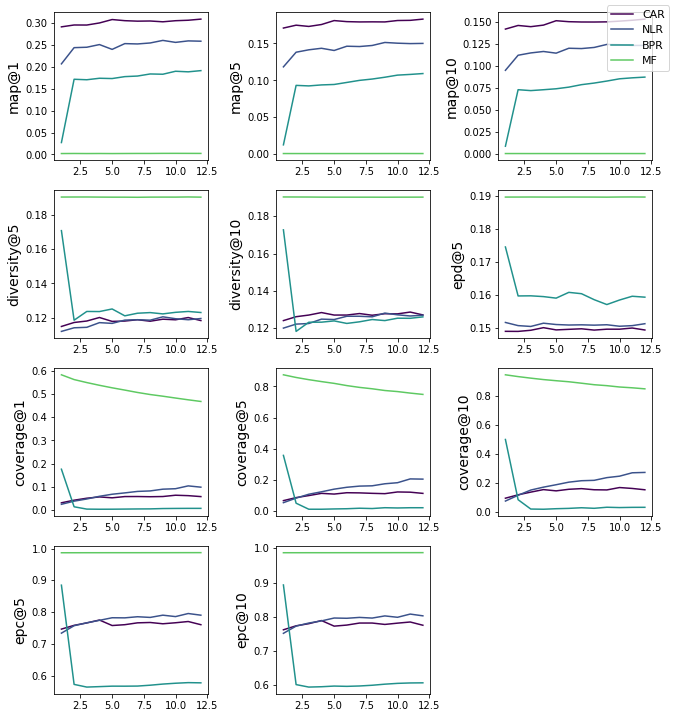

In [18]:
def plot_models(ax, models, prop):
    i = 0
    col = get_colors(range(len(models)))
    for m in models:
        ax.plot(m.index + 1, m[prop], color=col[i])   
        i = i + 1

data = [ml_car, ml_nlr, ml_bpr, ml_mf]
fig = plt.figure(figsize=(9.4,10))
i = 1
for prop in ['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'epc@5', 'epc@10']:
    ax1 = fig.add_subplot(4,3,i)
    ax1.set_ylabel(prop,  fontsize=14)
    plot_models(ax1, data, prop)
    i = i + 1
plt.tight_layout()
fig.legend(['CAR', 'NLR', 'BPR', 'MF'], fontsize=11)
fig.savefig('../plots/Comparison_ML.pdf')

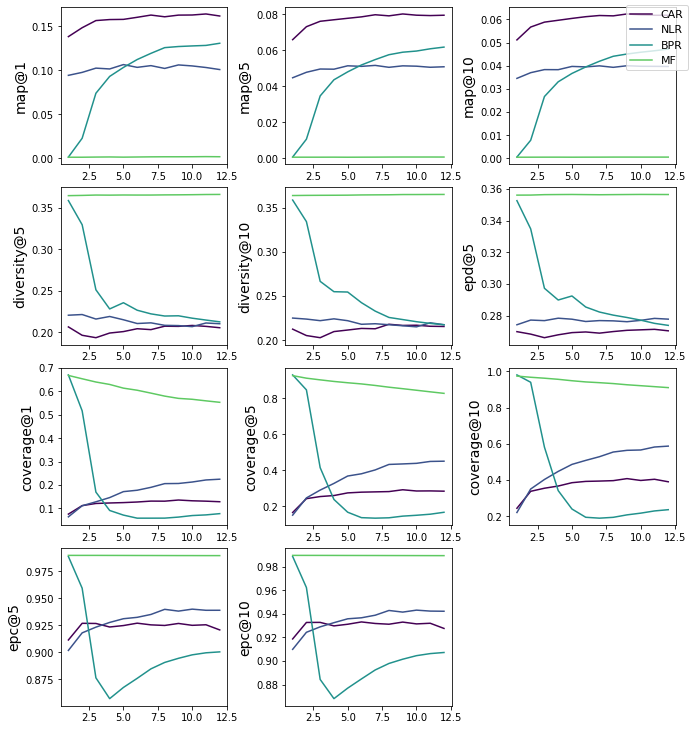

In [19]:
data = [msd_car, msd_nlr, msd_bpr, msd_mf]
fig = plt.figure(figsize=(9.4,10))
i = 1
for prop in ['map@1', 'map@5', 'map@10', 'diversity@5', 'diversity@10', 'epd@5', 'coverage@1', 'coverage@5', 'coverage@10', 'epc@5', 'epc@10']:
    ax1 = fig.add_subplot(4,3,i)
    ax1.set_ylabel(prop,  fontsize=14)
    plot_models(ax1, data, prop)
    i = i + 1
plt.tight_layout(pad=0.2, w_pad=0, h_pad=0.3)
fig.legend(['CAR', 'NLR', 'BPR', 'MF'], fontsize=11)
fig.savefig('../plots/Comparison_MSD.pdf')

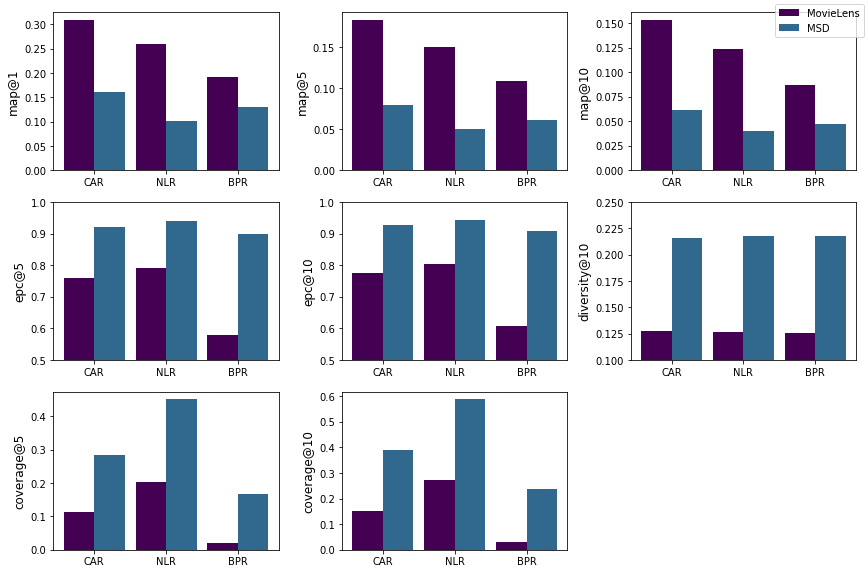

In [21]:
metrics = comparison_trained[comparison_trained.index.get_level_values(1).isin(['CAR', 'NLR', 'BPR'])].transpose()

width = 0.85
bar_c = get_colors(range(3))
fig = plt.figure(figsize=(12,8))
def plot_prop(ax, ml_data, msd_data, prop):
    x_values = np.arange(len(ml_data))
    ax.bar(x_values - width/4, ml_data[prop], width/2, label='MovieLens', color=bar_c[0])
    ax.bar(x_values + width/4, msd_data[prop], width/2, label='MSD', color=bar_c[1])
    ax.set_xticks(x_values)
    ax.set_xticklabels(ml_data.index)
    

    
    ax.set_ylabel(prop, fontsize=12)
    
ax1 = fig.add_subplot(331)
plot_prop(ax1, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'map@1')
ax2 = fig.add_subplot(332)
plot_prop(ax2, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'map@5')
ax3 = fig.add_subplot(333)
plot_prop(ax3, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'map@10')
ax4 = fig.add_subplot(3,3,4)
ax4.set_ylim(0.5, 1.0)
plot_prop(ax4, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'epc@5')
ax5 = fig.add_subplot(3,3,5)
ax5.set_ylim(0.5,1.0)
plot_prop(ax5, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'epc@10')
ax6 = fig.add_subplot(3,3,6)
ax6.set_ylim(0.1, 0.25)
plot_prop(ax6, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'diversity@10')
ax7 = fig.add_subplot(3,3,7)
# ax7.set_ylim(0.1,0.5)
plot_prop(ax7, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'coverage@5')
ax8 = fig.add_subplot(3,3,8)
# ax8.set_ylim(0.1,0.6)
plot_prop(ax8, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'coverage@10')

fig.legend(['MovieLens','MSD'])
plt.tight_layout()

fig.savefig('../Graphics/Plots/Baselone_comparison.pdf')

In [69]:
comparison_trained.filter(items=, axis=0)

,,accuracy,accuracy_weight,batch_size,coverage@1,coverage@10,coverage@5,dimensions,diversity@10,diversity@5,diversity_weight,...,map@1,map@10,map@5,novelty_weight,nr_hidden_layers,nr_item_samples,optimizer,precision@5,recall@5,training_time
dataset,name,,,,,,,,,,,,,,,,,,,,,


In [72]:
comparison_trained[comparison_trained.index.get_level_values(1).isin(['CAR', 'NLR', 'BPR'])]

,,accuracy,accuracy_weight,batch_size,coverage@1,coverage@10,coverage@5,dimensions,diversity@10,diversity@5,diversity_weight,...,map@1,map@10,map@5,novelty_weight,nr_hidden_layers,nr_item_samples,optimizer,precision@5,recall@5,training_time
dataset,name,,,,,,,,,,,,,,,,,,,,,
MovieLens,CAR,0.833584,1.0,32,0.058569,0.152972,0.112802,10381.0,0.127154,0.118393,0.75,...,0.308767,0.153121,0.182997,0.75,NaN,NaN,adam,0.244256,0.109860,87.0
MSD,CAR,0.845645,1.0,32,0.127980,0.390346,0.284118,6712.0,0.215461,0.205441,0.75,...,0.161739,0.061788,0.079463,0.75,NaN,NaN,adam,0.120417,0.061250,61.0
MovieLens,NLR,0.813804,NaN,64,0.099123,0.272806,0.204412,NaN,0.126980,0.119592,NaN,...,0.258410,0.123333,0.150113,NaN,3.0,4096.0,NaN,0.209309,0.087828,75.0
MSD,NLR,0.773819,NaN,24,0.224374,0.587157,0.450983,NaN,0.217477,0.210255,NaN,...,0.100836,0.039691,0.050864,NaN,3.0,4096.0,NaN,0.081883,0.041001,110.0
MovieLens,BPR,0.807616,NaN,2048,0.007899,0.031789,0.020615,NaN,0.126104,0.123089,NaN,...,0.191288,0.087370,0.109288,NaN,NaN,NaN,NaN,0.156132,0.058848,400.0
MSD,BPR,0.821479,NaN,2048,0.077026,0.236293,0.166716,NaN,0.217385,0.212522,NaN,...,0.130741,0.047200,0.061779,NaN,NaN,NaN,NaN,0.095567,0.046743,300.0


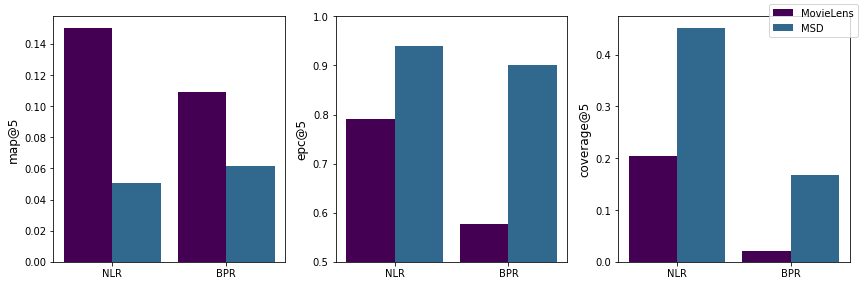

In [32]:
metrics = comparison_trained[comparison_trained.index.get_level_values(1).isin([ 'NLR', 'BPR'])].transpose()

width = 0.85
bar_c = get_colors(range(3))
fig = plt.figure(figsize=(12,4))
def plot_prop(ax, ml_data, msd_data, prop):
    x_values = np.arange(len(ml_data))
    ax.bar(x_values - width/4, ml_data[prop], width/2, label='MovieLens', color=bar_c[0])
    ax.bar(x_values + width/4, msd_data[prop], width/2, label='MSD', color=bar_c[1])
    ax.set_xticks(x_values)
    ax.set_xticklabels(ml_data.index)
    
    ax.set_ylabel(prop, fontsize=12)
    
ax1 = fig.add_subplot(131)
plot_prop(ax1, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'map@5')
ax2 = fig.add_subplot(132)
ax2.set_ylim(0.5, 1.0)
plot_prop(ax2, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'epc@5')
ax3 = fig.add_subplot(133)
plot_prop(ax3, metrics.MovieLens.transpose(), metrics.MSD.transpose(), 'coverage@5')

fig.legend(['MovieLens','MSD'])
plt.tight_layout()

fig.savefig('../Graphics/Plots/Poster_comparison.pdf')